Kinematics exercise link: https://canvas.education.lu.se/courses/37285/assignments/257751



In [457]:
import numpy as np
from sympy.external.gmpy import invert

In [458]:
o_0 = np.eye(3)

# When showing results split them into the column vectors as e1, e2, e3 were given

# Rotate around y by alfa
a = 10

rotation = np.array([
    [np.cos(a), 0, np.sin(a)],
    [0, 1, 0],
    [-np.sin(a), 0, np.cos(a)]
]
)

print(o_0)
print(rotation)
print(o_0 @ rotation)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[-0.83907153  0.         -0.54402111]
 [ 0.          1.          0.        ]
 [ 0.54402111  0.         -0.83907153]]
[[-0.83907153  0.         -0.54402111]
 [ 0.          1.          0.        ]
 [ 0.54402111  0.         -0.83907153]]


In [459]:
print(rotation)  # 1b

[[-0.83907153  0.         -0.54402111]
 [ 0.          1.          0.        ]
 [ 0.54402111  0.         -0.83907153]]


In [460]:
# c:

a = np.pi/4

rotation = np.array([
    [np.cos(a), 0, np.sin(a)],
    [0, 1, 0],
    [-np.sin(a), 0, np.cos(a)]
]
)

#print(o_0)
#print(rotation)
print(o_0 @ rotation)
# alfa pi/4 is 45 degrees, so each transformed axis should have size 1/sqrt(2) which we can see is true.


[[ 0.70710678  0.          0.70710678]
 [ 0.          1.          0.        ]
 [-0.70710678  0.          0.70710678]]


In [461]:
# d: This can not be done using a 4x4 matrix, we can instead use a 3x4 matrix which is often called a transformation matrix.

# The matrix would look like this:

t = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 1],
    [0, 0, 1, 0],
    [0, 0, 0, 1]]
)
print(t)

[[1 0 0 0]
 [0 1 0 1]
 [0 0 1 0]
 [0 0 0 1]]


In [462]:
# 2a: find the DH parameters for the coordinate frames

# d offset along previous z to the common normal
# θ angle about previous z from old to new x
# r length of the common normal
# a (alfa) angle about common normal from old z to new z

# z0 frame, x_0 positive, y_0 negative
# z1 frame, x_1 positive, y_1 negative, l1 y space away from z0
# z2 frame, x_2 positive, y_2 positive, l2 y space away from z0

# Using x as common normal, according to the image theta_1 and theta_2 are both 0.
#       d   a       r   theta
# z1:   0   0       l1  theta_1
# z2:   0   -pi     l2  theta_2

In [463]:
# 2b:
# T_x_y = > Z_(x-1) @ X_n
l1 = 1
l2 = 1
trans0 = np.array(
    [
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ]
)

trans1 = np.array(
    [
        [1, 0, 0, l1],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ]
)

rot_1_0 = np.array(
    [
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ]
)

T_0_to_1 = trans1 @ rot_1_0

trans2 = np.array(
    [
        [1, 0, 0, l2],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ]
)

a_n = -np.pi
# Rotating -pi around x
rot_2_1 = np.array(
    [
        [1, 0, 0, 0],
        [0, np.cos(a_n), -np.sin(a_n), 0],
        [0, np.sin(a_n), np.cos(a_n), 0],
        [0, 0, 0, 1]
    ]
)
T_1_to_2 = trans2 @ rot_2_1
T_0_to_2 = T_0_to_1 @ T_1_to_2

print(T_0_to_2)

[[ 1.0000000e+00  0.0000000e+00  0.0000000e+00  2.0000000e+00]
 [ 0.0000000e+00 -1.0000000e+00  1.2246468e-16  0.0000000e+00]
 [ 0.0000000e+00 -1.2246468e-16 -1.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]]


In [464]:
# We now must get T_2_to_1, it is logical that T_2_to_1 should be the inverse of T_1_to_2
# TODO: Motivate this more
T_2_to_1 = np.linalg.inv(T_1_to_2)
print(T_2_to_1)  # This can be seen to be correct as the dx now is correct and the rotation matrix is also

[[ 1.0000000e+00  0.0000000e+00  0.0000000e+00 -1.0000000e+00]
 [-0.0000000e+00 -1.0000000e+00 -1.2246468e-16 -0.0000000e+00]
 [-0.0000000e+00  1.2246468e-16 -1.0000000e+00 -0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]]


In [465]:
# 2c

# The difference between a homogeneous transformation matrix and a rotation matrix is that a rotation matrix only rotates the frame but does not displace it linearly which a transformation matrix can do.

In [466]:
from sympy import Matrix, Symbol, cos, sin, print_latex, pi
# 3

# 3a:

l = Symbol("l") # All 3 links have this length
# We start with finding all the transform matrices

T1 = Matrix([
    [1, 0, l ],
    [0, 1, 0 ],
    [0, 0, 1 ],
])
T3 = T2 = T1  # All have the same link lengths

# I will see the first joint as rotating around z and the rest around x
theta1, theta2, theta3 = Symbol("t_1"), Symbol("t_2"), Symbol("t_3")
rot1 = Matrix([
    [cos(theta1), -sin(theta1), 0],
    [sin(theta1), cos(theta1), 0],
    [0, 0, 1],
])

rot2 = Matrix([
    [cos(theta2), -sin(theta2), 0],
    [sin(theta2), cos(theta2), 0],
    [0, 0, 1],
])

rot3 = Matrix([
    [cos(theta3), -sin(theta3), 0],
    [sin(theta3), cos(theta3), 0],
    [0, 0, 1],
])
T3_0_to_2 = Matrix((((Matrix(np.eye(3)) @ rot1 @ T1) @ (rot2 @ T2)) @ (rot3 @ T3)))
#print_latex(T3_0_to_2)
T3_0_to_2.simplify()  # The function from angle to position for x is given from column 3 row 1 in the matrix, and for y in col 3 row 2.
theta_to_x = T3_0_to_2[2]
theta_to_y = T3_0_to_2[5]
T3_0_to_2

Matrix([
[1.0*cos(t_1 + t_2 + t_3), -1.0*sin(t_1 + t_2 + t_3), 1.0*l*(cos(t_1) + cos(t_1 + t_2) + cos(t_1 + t_2 + t_3))],
[1.0*sin(t_1 + t_2 + t_3),  1.0*cos(t_1 + t_2 + t_3), 1.0*l*(sin(t_1) + sin(t_1 + t_2) + sin(t_1 + t_2 + t_3))],
[                       0,                         0,                                                      1.0]])

In [467]:
# 3b.
"""
To check your solution, compute the forward kinematics for the following joint
configurations (θ1,θ2,θ3): (0, 0, 0),(0, π/4, π/4). Are the resulting homogeneous
transformation matrices in agreement with what you would expect? Draw the
robot configuration in the respective case and mark the end-effector / tool frame.
"""
T3_0_to_2.subs({theta1: 0, theta2: 0, theta3: 0, l: 2})

Matrix([
[1.0,   0, 6.0],
[  0, 1.0,   0],
[  0,   0, 1.0]])

In [468]:
T3_0_to_2.subs({theta1: 0, theta2: pi/4, theta3: pi/4, l: 2})

Matrix([
[  0, -1.0, 1.0*sqrt(2) + 2.0],
[1.0,    0, 1.0*sqrt(2) + 2.0],
[  0,    0,               1.0]])

In [469]:
# 3c:
# As we have three joints in a 2D situation all reachable points have an infinite amount of possible joint value combinations.

# It is also possible to find a close form solution for the inverse kinematics problem here, it is (somewhat) simply required to invert the theta to x and theta to y functions.

In [470]:
# 4a)
# The equations for forward and inverse kinematics for two-link planar from the slides.
# Forward
theta1 = Symbol("theta1")
a_1 = Symbol("a_1")
a_2 = Symbol("a_2")
theta2 = Symbol("theta2")
x4_forward = a_1 * cos(theta1) + a_2 * cos(theta1 + theta2)
x4_forward

a_1*cos(theta1) + a_2*cos(theta1 + theta2)

In [471]:
y4_forward = a_1 * sin(theta1) + a_2 * sin(theta1 + theta2)
y4_forward

a_1*sin(theta1) + a_2*sin(theta1 + theta2)

In [472]:
# Inverse kinematics

from sympy import symbols, acos, atan2, simplify, lambdify, atan, sqrt

x, y, a1, a2 = symbols('x y a1 a2', real=True)
r2 = x**2 + y**2

#cos_theta2 = ((x**2 + y**2) - a1 ** 2 - a2 ** 2) / (2 * a1 * a2)

# Using the version which is said to be more numerically stable
links = {a1: 2, a2: 2}
start_values = {**links, x: 0, y: 4}
theta2_solution = acos(
    (
        x**2 + y**2 - a1**2 -a2**2
    ) /
    (2 * a1 * a2)
)

fi = atan2(y, x)

theta_solution = Symbol("theta2")
gamma = atan2(a2*sin(theta_solution), a1 + a2*cos(theta_solution))

theta1_solution = fi - gamma
theta1_solution

atan2(y, x) - atan2(a2*sin(theta2), a1 + a2*cos(theta2))

In [473]:
# 4b) The points; S: (0, 4), A: (2, 3), B: (1, 1), C(3, 2), D(3, 1)

points = {"S": (0, 4), "A": (2, 3), "B": (1, 1), "C": (3, 2), "D": (3, 1)}

# Calculate joint angles for each of the points above
res = theta2_solution.subs(start_values)
res

0

In [474]:
theta1_solution.subs({**start_values, theta_solution: res})

pi/2

In [475]:
theta1_solution.subs({**start_values, theta1_solution: -res})

def solutions(_x, _y):
    _vals = {**links, x: _x, y: _y}
    _theta2 = theta2_solution.subs(_vals).evalf()
    _theta1_pos = theta1_solution.subs({**_vals, theta_solution: _theta2}).evalf()
    _theta1_neg = theta1_solution.subs({**_vals, theta_solution: -_theta2}).evalf()

    return [(_theta1_pos, _theta2), (_theta1_neg, -_theta2)]

print(solutions(0, 4))

[(1.57079632679490, 0), (1.57079632679490, 0)]


In [476]:
for name, coords in points.items():
    print(f"{name} = {coords}, joint values {solutions(*coords)}")

S = (0, 4), joint values [(1.57079632679490, 0), (1.57079632679490, 0)]
A = (2, 3), joint values [(0.534961326318397, 0.895664793857865), (1.43062612017626, -0.895664793857865)]
B = (1, 1), joint values [(-0.424031039490740, 2.41885840577638), (1.99482736628564, -2.41885840577638)]
C = (3, 2), joint values [(0.140170206618635, 0.895664793857865), (1.03583500047650, -0.895664793857865)]
D = (3, 1), joint values [(-0.337307481429767, 1.31811607165282), (0.980808590223051, -1.31811607165282)]


In [477]:
# Also print in degrees:

def rad2deg(rad):
    return (rad * 180 / pi).evalf()

for name, coords in points.items():
    solution_in_degrees = [(rad2deg(a), rad2deg(b)) for a, b in solutions(*coords)]
    print(f"{name} = {coords}, joint values {solution_in_degrees}")

S = (0, 4), joint values [(90.0000000000000, 0), (90.0000000000000, 0)]
A = (2, 3), joint values [(30.6510262007649, 51.3178125465106), (81.9688387472755, -51.3178125465106)]
B = (1, 1), joint values [(-24.2951889453646, 138.590377890729), (114.295188945365, -138.590377890729)]
C = (3, 2), joint values [(8.03116125272451, 51.3178125465106), (59.3489737992351, -51.3178125465106)]
D = (3, 1), joint values [(-19.3262950841130, 75.5224878140701), (56.1961927299570, -75.5224878140701)]


In [478]:
from sympy import Function

# Create a cubic polynomial trajectory for going from A -> B -> C -> D
# So we fit a cubic polynomial to start at A and go through each of them

# This is defined as the angles we need to reach, so the trajectory is over angles, we make one trajectory curve per joint, per path?

# We arbitrarily take the first of each solution
target_joint_values = [solutions(*points[name])[0] for name in ["S", "A", "B", "C", "D"]]
#print(target_joint_values)

t_0 = Symbol("t_0")
t_f = Symbol("t_f")

a_0, a_1, a_2, a_3 = symbols("a_0 a_1 a_2 a_3")
q_0, v_0, q_f, v_f = symbols("q_0 v_0 q_f v_f")

Q = Matrix([
    [1, t_0, t_0**2, t_0**3],
    [0, 1, 2*t_0, 3*t_0**2],
    [1, t_f, t_f**2, t_f**3],
    [0, 1, 2*t_f, 3*t_f**2],
])

a_vector = Matrix([a_0, a_1, a_2, a_3])

goal_vector = Matrix([q_0, v_0, q_f, v_f])

# We have Q @ a_vector = goal_vector => a_vector = inv(Q) * goal_vector

trajectories = list()

time_t = Symbol("t")
for prev, _next in zip(target_joint_values, target_joint_values[1:]):
    #print(prev, _next)
    # Now we create the linear equation for the cubic polynomial trajectory
    joint_trajectories = []
    for _joint_index in range(len(_next)):
        a = (Q.inv() * goal_vector).subs({t_0: 0, t_f: 2, q_0: prev[_joint_index], q_f: _next[_joint_index], v_0: 0, v_f: 0})
        # We now have the coefficients
        joint_trajectories.append((a[0] + a[1] * time_t + a[2] * time_t ** 2 + a[3] * time_t ** 3, a[1] + 2 * a[2] * time_t + 3 * a[3] * time_t ** 2))
    trajectories.append(joint_trajectories)



# We want to write in form
# q(t) = a0 + a1*t + a2*t^2 + a3*t^3
trajectories

[[(0.258958750119125*t**3 - 0.776876250357375*t**2 + 1.5707963267949,
   0.776876250357375*t**2 - 1.55375250071475*t),
  (-0.223916198464466*t**3 + 0.671748595393399*t**2,
   -0.671748595393399*t**2 + 1.3434971907868*t)],
 [(0.239748091452284*t**3 - 0.719244274356853*t**2 + 0.534961326318397,
   0.719244274356853*t**2 - 1.43848854871371*t),
  (-0.380798402979628*t**3 + 1.14239520893888*t**2 + 0.895664793857865,
   -1.14239520893888*t**2 + 2.28479041787777*t)],
 [(-0.141050311527344*t**3 + 0.423150934582032*t**2 - 0.42403103949074,
   -0.423150934582032*t**2 + 0.846301869164063*t),
  (0.380798402979628*t**3 - 1.14239520893888*t**2 + 2.41885840577638,
   1.14239520893888*t**2 - 2.28479041787777*t)],
 [(0.1193694220121*t**3 - 0.358108266036301*t**2 + 0.140170206618635,
   0.358108266036301*t**2 - 0.716216532072603*t),
  (-0.105612819448738*t**3 + 0.316838458346215*t**2 + 0.895664793857865,
   -0.316838458346215*t**2 + 0.633676916692429*t)]]

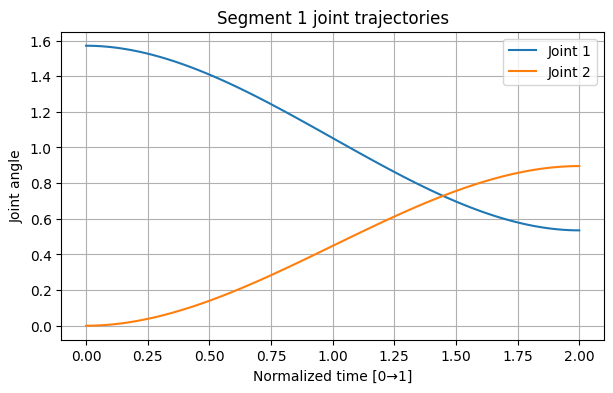

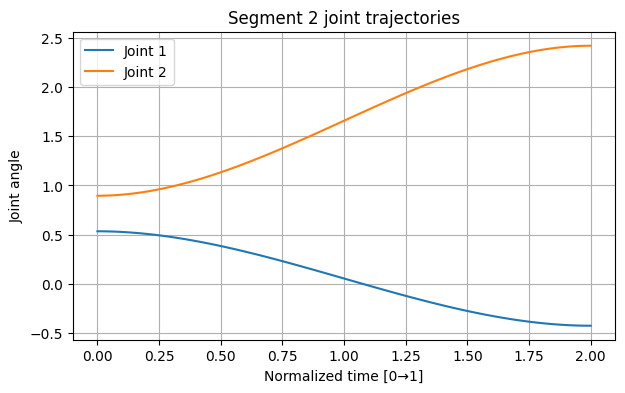

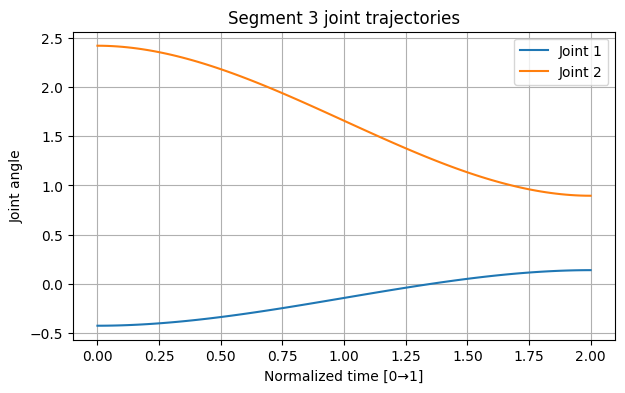

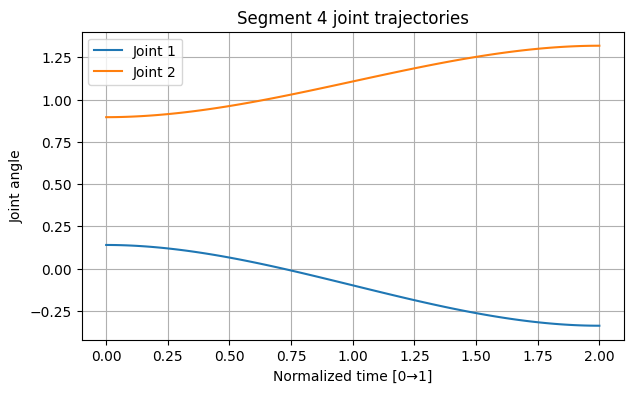

In [479]:
from matplotlib import pyplot as plt
# Plot the trajectory for x y both between 0 and 4
# Convert to numeric function for plotting
import sympy

# Assume `trajectories` is a list of segments, each segment is a list of symbolic joint expressions
x = np.linspace(0, 2, 100)  # normalized time for each segment

for i, segment in enumerate(trajectories):
    plt.figure(figsize=(7, 4))
    for j, (joint_traj, joint_traj_derivative) in enumerate(segment):
        # Evaluate symbolic expression numerically
        y_vals = [float(joint_traj.subs({time_t: t_val})) for t_val in x]
        plt.plot(x, y_vals, label=f"Joint {j+1}")

    plt.title(f"Segment {i+1} joint trajectories")
    plt.xlabel("Normalized time [0→1]")
    plt.ylabel("Joint angle")
    plt.legend()
    plt.grid(True)
    plt.show()

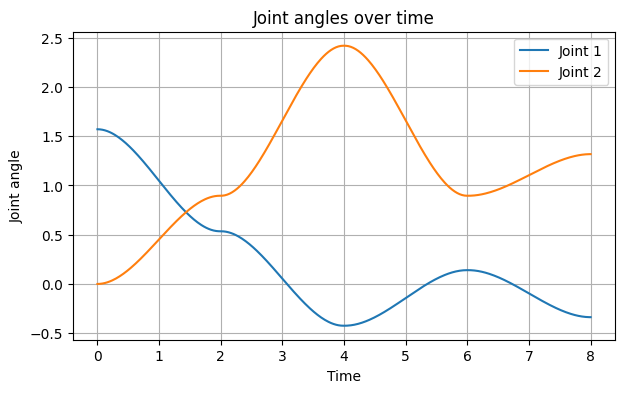

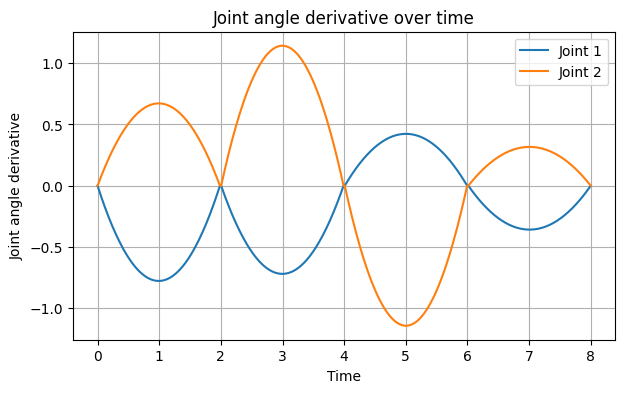

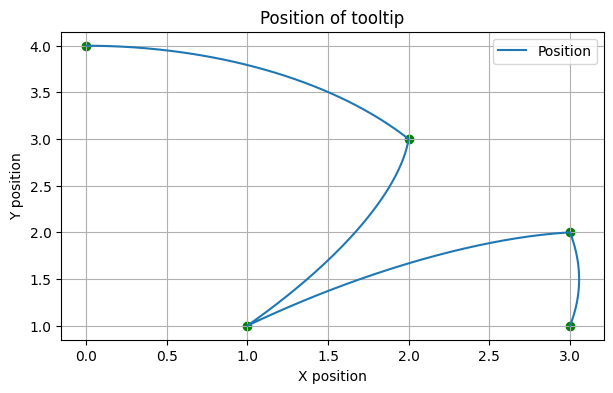

In [505]:
# 2c: We should now merge the trajectories into one graph.

x_traj = np.linspace(0, 2, 100)

joint_ys = [[], []]
joint_ys_deriv = [[], []]
x_coordinate, y_coordinate = [], []

for i, segment in enumerate(trajectories):
    for j, (joint_traj, joint_traj_derivative) in enumerate(segment):
        # Evaluate symbolic expression numerically
        y_vals = [float(joint_traj.subs({time_t: t_val})) for t_val in x_traj]
        joint_ys[j].extend(y_vals)
        y_vals_deriv = [float(joint_traj_derivative.subs({time_t: t_val})) for t_val in x_traj]
        joint_ys_deriv[j].extend(y_vals_deriv)

x_coordinate.extend([x4_forward.subs({theta1: _theta1, theta2: _theta2, a_1: 2, a_2: 2}) for _theta1, _theta2 in zip(*joint_ys)])
y_coordinate.extend([y4_forward.subs({theta1: _theta1, theta2: _theta2, a_1: 2, a_2: 2}) for _theta1, _theta2 in zip(*joint_ys)])


plt.figure(figsize=(7, 4))
x = np.linspace(0, 2*len(trajectories), 100*len(trajectories))  # normalized time for each segment
for j, joint_y in enumerate(joint_ys):
    # Evaluate symbolic expression numerically
    plt.plot(x, joint_ys[j], label=f"Joint {j+1}")
    plt.title(f"Joint angles over time")
    plt.xlabel("Time")
    plt.ylabel("Joint angle")
    plt.legend()
    plt.grid(True)
plt.show()
plt.figure(figsize=(7, 4))
for j, joint_y in enumerate(joint_ys_deriv):
    # Evaluate symbolic expression numerically
    plt.plot(x, joint_ys_deriv[j], label=f"Joint {j+1}")
    plt.title(f"Joint angle derivative over time")
    plt.xlabel("Time")
    plt.ylabel("Joint angle derivative")
    plt.legend()
    plt.grid(True)
plt.show()
plt.figure(figsize=(7, 4))
plt.plot(x_coordinate, y_coordinate, label=f"Position")
# Also put dots for each of the goals

x_targets, y_targets = list(zip(*points.values()))

plt.scatter(x=x_targets, y=y_targets, c="green")

plt.title(f"Position of tooltip")
plt.xlabel("X position")
plt.ylabel("Y position")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# 4d)

# Problems with applying the cubic trajectory could be that the robot requires more constraints
# it may for example require that the angle derivative is below some threshold
# we do also not account for any obstacles in the world.

#TODO look over this

# Higher order polynomials such as the quintic polynomial would add an constraint for the jerk making the angle change less fast.
# Disadvantages of higher order are that they are more difficult to implement and to calculate. They are also more sensitive to errors.

#The trajectory generation could rather easily be extended to conserve the velocity by simply inputting the last velocity value from the past segment into the next segments first equation.


